##### Firebase 

In [1]:
import firebase_admin
from firebase_admin import credentials

from firebase_admin import firestore

from firebase_admin import db

if not firebase_admin._apps:
    cred = credentials.Certificate("gait-analysis-7350b-firebase-adminsdk-czbst-e78dd10970.json")
    firebase_admin.initialize_app(cred,{'databaseURL':'https://gait-analysis-7350b-default-rtdb.asia-southeast1.firebasedatabase.app/230128_jihun'})

In [246]:
import pandas as pd
import numpy as np
def getDataName(person_name):
    dir = db.reference(person_name)
    data = np.array(dir.get())
    
    return data

def getPeakToPeak(person_name):
    list = []
    
    for i in range(1, 6):
        dir = db.reference(person_name + "/test" + str(i) + "/" + "Heel Strike")
        heelstrike = dir.get()
        dir = db.reference(person_name + "/test" + str(i) + "/" + "Toe Off")
        toeoff = dir.get()
        
        if len(heelstrike) <= len(toeoff):
            for i in range(len(heelstrike)):
                list.append(heelstrike[i] - toeoff[i])
        
        else:
            for i in range(len(toeoff)):
                list.append(heelstrike[i] - toeoff[i])

    #해당 실험자의 하나의 보행 파라미터에 대한 1차원 리스트 반혼
    return list

def getStepVelocity(person_name):
    peak_to_peak_mean = []
    step_velocity_mean = []


    for i in range(1, 6):
        
        peak_list = []

        dir = db.reference(person_name + "/test" + str(i) + "/" + "Heel Strike")
        heelstrike = dir.get()
        dir = db.reference(person_name + "/test" + str(i) + "/" + "Toe Off")
        toeoff = dir.get()
        dir = db.reference(person_name + "/test" + str(i) + "/" + "Step Velocity")

        #Step Velocity 평균
        step_velocity_mean.append(np.mean(dir.get()))

        if len(heelstrike) <= len(toeoff):
            for i in range(len(heelstrike)):
                peak_list.append(heelstrike[i] - toeoff[i])
        
        else:
            for i in range(len(toeoff)):
                peak_list.append(heelstrike[i] - toeoff[i])
        
        peak_to_peak_mean.append(np.mean(peak_list))
        
    #해당 실험자의 하나의 보행 파라미터에 대한 1차원 리스트 반혼
    return [peak_to_peak_mean, step_velocity_mean]


<hr>

### Dataframe에 데이터 넣기

In [164]:
import pandas as pd
total_dataframe = pd.DataFrame(columns=['Peak to Peak', 'Height'])

#### 백장현

In [239]:
male_data = []
height_list = []

velocity_mean_list = []
peak_mean_list = []

In [240]:
data = getPeakToPeak("Baek janghyeon")
velocity = getStepVelocity("Baek janghyeon")

velocity_mean_list += velocity[1]
peak_mean_list += velocity[0]
height = [169 for i in range(len(data))]

In [203]:
male_data += data
height_list += height

#### 백민서

In [241]:
data =getPeakToPeak("Baek minseo")

velocity = getStepVelocity("Baek minseo")

velocity_mean_list += velocity[1]
peak_mean_list += velocity[0]
height = [166 for i in range(len(data))]

In [205]:
male_data += data
height_list += height

#### 빅승준

In [242]:
data =getPeakToPeak("Big seungjun")
velocity = getStepVelocity("Big seungjun")

velocity_mean_list += velocity[1]
peak_mean_list += velocity[0]
height = [175 for i in range(len(data))]

In [207]:
male_data += data
height_list += height

#### 정우진

In [243]:
data = getPeakToPeak("Jung woojin")
velocity = getStepVelocity("Jung woojin")

velocity_mean_list += velocity[1]
peak_mean_list += velocity[0]
height = [187 for i in range(len(data))]

In [209]:
male_data += data
height_list += height

#### 김민서

In [245]:
data = getPeakToPeak("Kim Minseo")

velocity = getStepVelocity("Kim Minseo")

velocity_mean_list += velocity[1]
peak_mean_list += velocity[0]
height = [183 for i in range(len(data))]

In [215]:
male_data += data
height_list += height

#### 김승준

In [247]:
data = getPeakToPeak("Kim Seungjin")
velocity = getStepVelocity("Kim Seungjin")

velocity_mean_list += velocity[1]
peak_mean_list += velocity[0]
height = [180 for i in range(len(data))]

In [218]:
male_data += data
height_list += height

#### 김민정

In [219]:
data = getPeakToPeak("Kim minjung")
height = [162 for i in range(len(data))]

In [220]:
male_data += data
height_list += height

#### 이지융

In [248]:
data = getPeakToPeak("Lee Jiyung")
velocity = getStepVelocity("Lee Jiyung")

velocity_mean_list += velocity[1]
peak_mean_list += velocity[0]
height = [176 for i in range(len(data))]

In [222]:
male_data += data
height_list += height

#### 오민우

In [249]:
data = getPeakToPeak("Oh Minwoo")
velocity = getStepVelocity("Oh Minwoo")

velocity_mean_list += velocity[1]
peak_mean_list += velocity[0]
height = [178 for i in range(len(data))]

In [224]:
male_data += data
height_list += height

#### 박재완

In [250]:
data = getPeakToPeak("Park jaewon")
velocity = getStepVelocity("Park jaewon")

velocity_mean_list += velocity[1]
peak_mean_list += velocity[0]
height = [180 for i in range(len(data))]

In [226]:
male_data += data
height_list += height

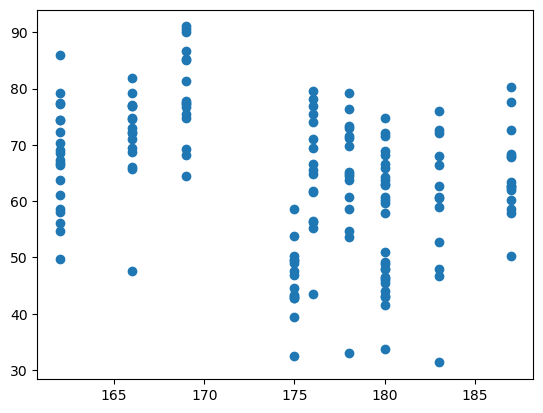

In [230]:
import matplotlib.pyplot as plt

plt.scatter(height_list, male_data)

plt.show()

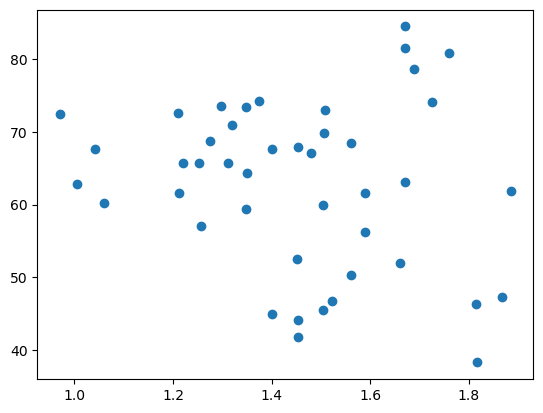

In [251]:
import matplotlib.pyplot as plt

plt.scatter(velocity_mean_list, peak_mean_list)

plt.show()